In [23]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [24]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [25]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 16:25:17,827  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:17,828  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:17,828  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:17,828  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:17,828  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:17,829  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:17,829  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:17,829  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:17,829  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:17,829  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 16:25:17,901  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 16:25:18,048  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 16:25:18,125  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 16:25:18,125  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 16:25:18,126  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 16:25:18,126  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 16:25:18,126  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 16:25:18,126  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [26]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [27]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 16:25:18,343  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:18,343  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:18,344  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:18,345  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 16:25:18,416  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 16:25:18,562  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 16:25:18,637  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 16:25:18,637  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 16:25:18,638  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 16:25:18,638  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 16:25:18,638  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 16:25:18,639  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [28]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8800,8801,3,2024-07-10 23:25:26,2,38,None,50000,-0.979,0.979790
8801,8802,3,2024-07-10 23:25:26,2,38,None,100000,-0.593,0.905837
8802,8803,3,2024-07-10 23:25:26,2,38,None,150000,-0.694,1.092930
8803,8804,3,2024-07-10 23:25:26,2,38,None,200000,-0.196,0.972494
8804,8805,3,2024-07-10 23:25:26,2,38,None,250000,-0.493,1.014610
...,...,...,...,...,...,...,...,...,...
8895,8896,3,2024-07-10 23:29:45,4,38,None,800000,0.900,0.300000
8896,8897,3,2024-07-10 23:29:45,4,38,None,850000,0.900,0.300000
8897,8898,3,2024-07-10 23:29:45,4,38,None,900000,1.000,0.000000
8898,8899,3,2024-07-10 23:29:45,4,38,None,950000,0.800,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

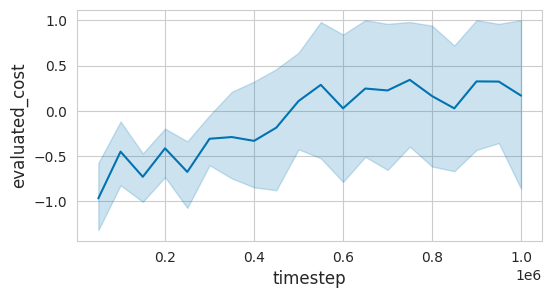

In [29]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

In [30]:
table_name = "net2deeper_grow_once"

In [31]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-07-18 16:25:19,089  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:19,089  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:19,089  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:19,089  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:19,089  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:19,090  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:19,090  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:19,090  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:19,090  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:19,090  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 16:25:19,161  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 16:25:19,309  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 16:25:19,386  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 16:25:19,386  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 16:25:19,387  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 16:25:19,387  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 16:25:19,387  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 16:25:19,387  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [32]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [33]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 16:25:19,602  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:19,602  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:19,603  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:19,603  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:19,604  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:19,604  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:19,604  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:19,604  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:19,604  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:19,605  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

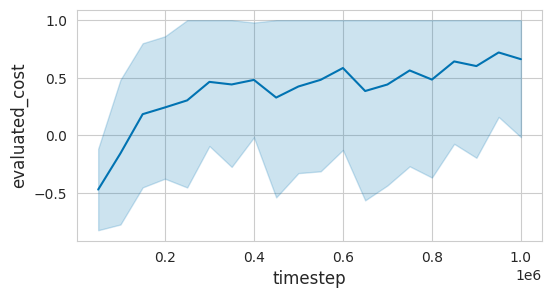

In [34]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-18 16:25:20,317  | py.warnings - WARNING  | /tmp/ipykernel_430009/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-18 16:25:20,317  | py.warnings - WARNING  | /tmp/ipykernel_430009/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-18 16:25

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

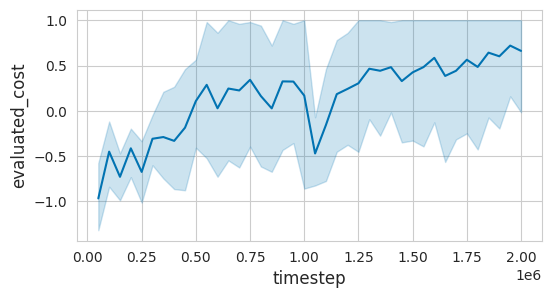

In [35]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline

In [36]:
table_name = "hpo_warmstart"

In [37]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 8]

2024-07-18 16:25:20,638  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:20,638  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:20,639  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:20,640  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:20,640  | py-experimenter - WARNING  | No values given for keyfield total_time

In [38]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [39]:
samc_cost_warmstarting_row

ID                                                                             152
experiment_id                                                                    8
timestamp                                                      2024-07-17 21:36:14
trial_number                                                                    36
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 128, 'ent_coef': 3.035832575602...
cost                                                                       -0.8006
Name: 85, dtype: object

In [40]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 16:25:21,169  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 16:25:21,170  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 16:25:21,170  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 16:25:21,171  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 16:25:21,171  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 16:25:21,171  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 16:25:21,171  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 16:25:21,172  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 16:25:21,172  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 16:25:21,172  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 16:25:21,244  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 16:25:21,390  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 16:25:21,466  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 16:25:21,466  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 16:25:21,467  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 16:25:21,467  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 16:25:21,467  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 16:25:21,467  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [41]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
8500,15181,8,2024-07-17 21:28:32,2,35,1000000,None,50000,-1.288,1.092500
8501,15182,8,2024-07-17 21:28:33,2,35,1000000,None,100000,-0.678,1.074520
8502,15183,8,2024-07-17 21:28:33,2,35,1000000,None,150000,-0.492,1.013050
8503,15184,8,2024-07-17 21:28:33,2,35,1000000,None,200000,-0.994,0.994054
8504,15185,8,2024-07-17 21:28:33,2,35,1000000,None,250000,-0.789,0.966400
...,...,...,...,...,...,...,...,...,...,...
8595,15276,8,2024-07-17 21:36:12,4,35,1000000,None,800000,1.000,0.000000
8596,15277,8,2024-07-17 21:36:12,4,35,1000000,None,850000,1.000,0.000000
8597,15278,8,2024-07-17 21:36:12,4,35,1000000,None,900000,1.000,0.000000
8598,15279,8,2024-07-17 21:36:12,4,35,1000000,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

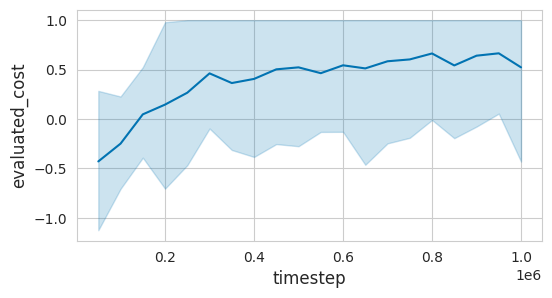

In [42]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

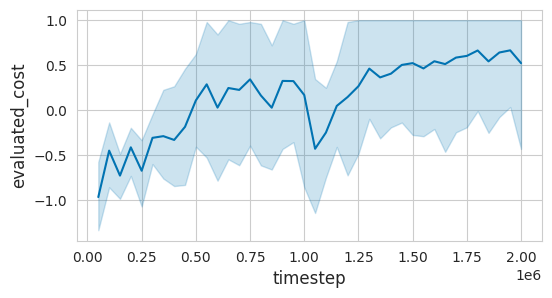

In [43]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([relevat_training_process_before_growth, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

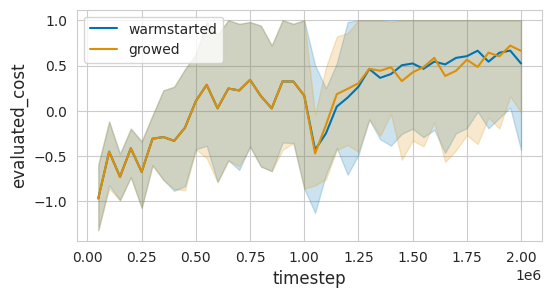

In [44]:
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="growed")
